In [8]:
import os
import geopandas as gpd
import py3dep
import copy 

hucs_on_carbs_with_sinks = gpd.read_file('huc12_on_carbs_with_sinks.shp')

max_tries = 2
dem_res = 10

rasterdir = 'carb_huc_dems'
if not os.path.exists(rasterdir):
        os.makedirs(rasterdir)


for idx, row in hucs_on_carbs_with_sinks.iterrows():
    if idx<2:
        huc12_str = copy.copy(row.huc12)
        this_hu12 = row.geometry
        rasterfile = huc12_str + "-3DEP.tif"
        
        finished = False
        tries = 0

        full_rasterfile_path = os.path.join(rasterdir, rasterfile)
        hucs_completed = []
        hucs_failed = []

        # Check if we already have the dem
        if not os.path.isfile(full_rasterfile_path):
            while not finished:
                try:
                    print("Downloading dem for ", huc12_str)
                    dem = py3dep.get_dem(this_hu12, dem_res)
                    finished = True
                    failed = False
                    # Convert to projected CRS
                    dem = dem.rio.reproject(5070)
                    dem.rio.to_raster(full_rasterfile_path)
                    hucs_completed.append(huc12_str)
                except Exception as error:
                    print("Failed to retrieve DEM for", huc12_str + ".")
                    print("error:", error)
                    tries += 1
                    if tries > max_tries:
                        finished = True
                        failed = True
                        hucs_failed.append(huc12_str)
            if failed:
                print("Failed to retrieve the DEM ("+ huc12_str +") after", str(max_tries), "tries.")       
        else:
            print("We already have dem raster", rasterfile, " continuing without download.")

completed_file = os.path.join(rasterdir, 'completed_dems.txt')
with open(completed_file, 'w') as f:
    for huc in hucs_completed:
        f.write("%s\n" % huc)

failed_file = os.path.join(rasterdir, 'failed_dems.txt')
with open(failed_file, 'w') as f:
    for huc in hucs_failed:
        f.write("%s\n" % huc)



In [10]:
dem.rio.r

{'3DEPElevation': 'None#_FillValue=nan',
 'AREA_OR_POINT': 'Area',
 'DataType': 'Generic',
 'SourceBandIndex': 0,
 '_FillValue': nan,
 'nodatavals': (nan,)}

In [18]:
hucs_on_carbs_with_sinks.to_crs('5070', inplace=True)
hucs_on_carbs_with_sinks.crs


<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [130]:

hucs_on_carbs_with_sinks

,objectid,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,...,name,hutype,humod,tohuc,noncontrib,noncontr_1,globalid,shape_Leng,shape_Area,geometry
0,290.0,{2CA97DB1-206D-479F-AD9B-BFFF02D6B080},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:26.000,None,11009.96,44.56,...,Headwaters East River,S,OT,050500020604,0.0,0.000000,{A974C8CE-E29C-11E2-8094-0021280458E6},0.443588,0.004527,"POLYGON ((1306948.686 1688805.224, 1306955.067..."
1,307.0,{FF9C9CE2-41EA-4FD3-8A66-11A01539F47E},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:27.000,None,13538.35,54.79,...,Bear Spring Branch-New River,S,KA,050500020304,0.0,0.000000,{B3406080-E29C-11E2-8094-0021280458E6},0.428540,0.005566,"POLYGON ((1344376.726 1693937.185, 1344376.692..."
2,313.0,{7C63AE71-F316-4AA5-85D0-F7F151164254},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:29.000,None,24918.92,100.84,...,Clendennin Creek-Bluestone Lake,S,KA,050500021001,0.0,0.000000,{B5812F59-E29C-11E2-8094-0021280458E6},0.648268,0.010255,"POLYGON ((1324729.378 1701176.624, 1324646.114..."
3,314.0,{A1C2034D-B884-43C0-BB80-D7EBA45BD276},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:30.000,None,37156.11,150.37,...,Upper Dry Fork,S,"KA,MA",050702010104,0.0,0.000000,{B581CE67-E29C-11E2-8094-0021280458E6},0.790867,0.015261,"POLYGON ((1254055.699 1681860.786, 1254107.920..."
4,316.0,{2EFAC430-CF7D-43D1-852E-ECFEE039ABFF},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:29.000,None,37923.37,153.47,...,East River,S,KA,050500021001,0.0,0.000000,{B5814D8E-E29C-11E2-8094-0021280458E6},0.780960,0.015605,"POLYGON ((1312933.431 1700944.244, 1312973.103..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,101390.0,{25DBA6A2-44EA-452B-9CA1-ED7C55DF9854},None,None,None,None,2020/10/22 11:00:11.000,None,22506.68,91.08,...,Upper Pochuck Creek,S,TF,020200070207,0.0,0.000000,{A7DD194B-E29C-11E2-8094-0021280458E6},0.654087,0.009781,"POLYGON ((1773503.842 2234109.978, 1773574.117..."
2173,102740.0,{2E24071C-38FC-4F42-835D-40BC16155C20},{1D4677AC-2D48-4DC1-B163-135B6A3A6B53},None,None,None,2015/04/14 09:21:34.000,None,26665.86,107.91,...,Bradley Lake,D,NM,031002080902,0.0,0.000000,{986CA75D-E29C-11E2-8094-0021280458E6},0.823203,0.009969,"POLYGON ((1340660.474 736372.592, 1340673.749 ..."
2174,102790.0,{17FA9547-833E-4EC2-B9A5-029221972A86},{0E0DAEE0-CA9E-42B5-9FE6-BBD99DFA0654},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,None,2022/01/13 13:22:07.000,None,26833.41,108.59,...,Lake Miona,D,OT,031002080705,0.0,0.000000,{986C1F76-E29C-11E2-8094-0021280458E6},0.688178,0.010047,"POLYGON ((1359710.016 754817.082, 1359756.028 ..."
2175,102870.0,{584E8B50-A8FF-4BA4-91A1-53773E136FAE},None,None,None,None,2013/01/18 07:08:11.000,None,42773.64,173.10,...,Paynes Prairie,D,SC,030801021106,29227.0,118.277577,{9861CF22-E29C-11E2-8094-0021280458E6},0.838683,0.016119,"POLYGON ((1319027.686 828153.280, 1318955.783 ..."


In [14]:
import re
import os
import glob

res = [f for f in glob.glob('carb_huc_dems/*.tif') if re.search(r'[\d]{12}-3DEP.tif' ,f)]
res

['carb_huc_dems/050500020301-3DEP.tif',
 'carb_huc_dems/050500020603-3DEP.tif',
 'carb_huc_dems/050702010103-3DEP.tif',
 'carb_huc_dems/050500020602-3DEP.tif']

In [37]:
t1 = res[1].split('/')[-1].split('-')[0]

In [38]:
import pandas

x = pandas.concat([test[test.huc12 == t],test[test.huc12 == t2],test[test.huc12 == t1]])

In [42]:
r = test[test.huc12 == t]
r['p_karst'] = 0.5
r

/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,objectid,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,...,hutype,humod,tohuc,noncontrib,noncontr_1,globalid,shape_Leng,shape_Area,geometry,p_karst
1,307.0,{FF9C9CE2-41EA-4FD3-8A66-11A01539F47E},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:27.000,None,13538.35,54.79,...,S,KA,050500020304,0.0,0.0,{B3406080-E29C-11E2-8094-0021280458E6},0.42854,0.005566,"POLYGON ((1344376.726 1693937.185, 1344376.692...",0.5


In [45]:
for idx in test.index:
    hu = test.iloc[idx]
    print(hu.crs)

AttributeError: 'Series' object has no attribute 'crs'

In [47]:
type(r)

geopandas.geodataframe.GeoDataFrame

In [52]:
idx = test.index[test.huc12==t]
test.loc[idx,'p_karst'] = 0.5
test

,objectid,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,...,hutype,humod,tohuc,noncontrib,noncontr_1,globalid,shape_Leng,shape_Area,geometry,p_karst
0,290.0,{2CA97DB1-206D-479F-AD9B-BFFF02D6B080},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:26.000,None,11009.96,44.56,...,S,OT,050500020604,0.0,0.000000,{A974C8CE-E29C-11E2-8094-0021280458E6},0.443588,0.004527,"POLYGON ((1306948.686 1688805.224, 1306955.067...",NaN
1,307.0,{FF9C9CE2-41EA-4FD3-8A66-11A01539F47E},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:27.000,None,13538.35,54.79,...,S,KA,050500020304,0.0,0.000000,{B3406080-E29C-11E2-8094-0021280458E6},0.428540,0.005566,"POLYGON ((1344376.726 1693937.185, 1344376.692...",0.5
2,313.0,{7C63AE71-F316-4AA5-85D0-F7F151164254},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:29.000,None,24918.92,100.84,...,S,KA,050500021001,0.0,0.000000,{B5812F59-E29C-11E2-8094-0021280458E6},0.648268,0.010255,"POLYGON ((1324729.378 1701176.624, 1324646.114...",NaN
3,314.0,{A1C2034D-B884-43C0-BB80-D7EBA45BD276},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:30.000,None,37156.11,150.37,...,S,"KA,MA",050702010104,0.0,0.000000,{B581CE67-E29C-11E2-8094-0021280458E6},0.790867,0.015261,"POLYGON ((1254055.699 1681860.786, 1254107.920...",NaN
4,316.0,{2EFAC430-CF7D-43D1-852E-ECFEE039ABFF},{7E9D2B22-BF65-426E-9174-661A4609B6FA},None,None,None,2017/05/25 13:11:29.000,None,37923.37,153.47,...,S,KA,050500021001,0.0,0.000000,{B5814D8E-E29C-11E2-8094-0021280458E6},0.780960,0.015605,"POLYGON ((1312933.431 1700944.244, 1312973.103...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,101390.0,{25DBA6A2-44EA-452B-9CA1-ED7C55DF9854},None,None,None,None,2020/10/22 11:00:11.000,None,22506.68,91.08,...,S,TF,020200070207,0.0,0.000000,{A7DD194B-E29C-11E2-8094-0021280458E6},0.654087,0.009781,"POLYGON ((1773503.842 2234109.978, 1773574.117...",NaN
2173,102740.0,{2E24071C-38FC-4F42-835D-40BC16155C20},{1D4677AC-2D48-4DC1-B163-135B6A3A6B53},None,None,None,2015/04/14 09:21:34.000,None,26665.86,107.91,...,D,NM,031002080902,0.0,0.000000,{986CA75D-E29C-11E2-8094-0021280458E6},0.823203,0.009969,"POLYGON ((1340660.474 736372.592, 1340673.749 ...",NaN
2174,102790.0,{17FA9547-833E-4EC2-B9A5-029221972A86},{0E0DAEE0-CA9E-42B5-9FE6-BBD99DFA0654},3D Elevation Product 1/3 Arc-second 1 x 1 degr...,U.S. Geological Survey,None,2022/01/13 13:22:07.000,None,26833.41,108.59,...,D,OT,031002080705,0.0,0.000000,{986C1F76-E29C-11E2-8094-0021280458E6},0.688178,0.010047,"POLYGON ((1359710.016 754817.082, 1359756.028 ...",NaN
2175,102870.0,{584E8B50-A8FF-4BA4-91A1-53773E136FAE},None,None,None,None,2013/01/18 07:08:11.000,None,42773.64,173.10,...,D,SC,030801021106,29227.0,118.277577,{9861CF22-E29C-11E2-8094-0021280458E6},0.838683,0.016119,"POLYGON ((1319027.686 828153.280, 1318955.783 ...",NaN


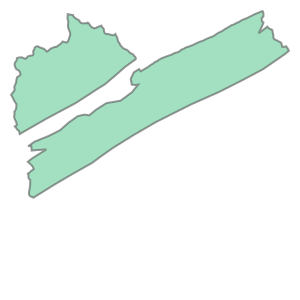

In [132]:
test_list = [{'p_karst':0.1, 'huc12':t, "carbs_huc":carbs_only_huc.iloc[0]}]

for this_dict in test_list:
    huc12_str =  this_dict['huc12']
    wantidx = hucs_on_carbs_with_sinks.index[hucs_on_carbs_with_sinks.huc12==huc12_str]
    hucs_on_carbs_with_sinks.loc[wantidx,'p_karst'] = this_dict['p_karst']
    hucs_on_carbs_with_sinks.loc[wantidx,'geometry'] = this_dict['carbs_huc']




In [58]:
import rasterio as rio

imgsrc_elev = rio.open('carb_huc_dems/050500020301-3DEP.tif')

In [63]:
imgsrc_elev.crs == hucs_on_carbs_with_sinks.crs

True

In [70]:
from pandas import DataFrame

df = DataFrame({'test':['asdf', 'qwer']})


In [71]:
df

,test
0,asdf
1,qwer


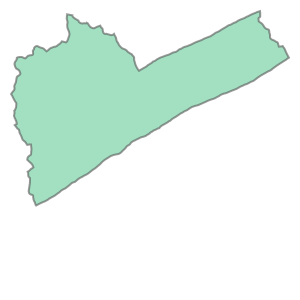

In [94]:
this_hu12 = hucs_on_carbs_with_sinks[hucs_on_carbs_with_sinks.huc12 == huc12_str].geometry.values[0]
this_hu12

In [112]:
huc = hucs_on_carbs_with_sinks[hucs_on_carbs_with_sinks.huc12 == huc12_str]
huc.iloc[0]

AttributeError: 'Series' object has no attribute 'crs'

In [113]:
huc_mask = gpd.GeoSeries([this_hu12], crs="5070")
huc_geom = huc_mask.geometry


In [114]:
huc_carbs = gpd.read_file(
        "./USGS-Karst-Map/Dissolved_carbonates_seperate_polys_E_B3.shp",
        mask=huc_geom,
    )

In [115]:
huc_carbs

,fid,KARST_TYPE,Climate,Induration,Exposure,ROCKTYPE1,ROCKTYPE2,ROCKTYPE3,UNIT_NAME,UNIT_AGE,...,UNIT_LINK,URL,NA_L3NAME,NA_L3CODE,COMMENTS,Shape_Leng,Shape_Area,layer,path,geometry
0,1.0,Carbonate rocks buried under =50 ft of glacial...,dry,Consolidated,B3,limestone,limestone,shale; clay or mud; sand,Niobrara Formation,Late Cretaceous,...,SDKn;0,http://mrdata.usgs.gov/geology/state/sgmc-unit...,Northwestern Glaciated Plains,9.3.1,None,2320.43139,121422.43149,Exposure_B3,/home/mcoving/tmp/Exposure_B3.gpkg|layername=E...,"POLYGON ((-87.01106 32.97244, -87.01174 32.972..."


In [116]:
carbs_dissolved = huc_carbs.dissolve()
if carbs_dissolved.crs != huc_mask.crs:
    carbs_dissolved.to_crs(huc_mask.crs, inplace=True)
carbs_dissolved.crs




<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [117]:
carbs_only_huc = huc_mask.intersection(carbs_dissolved.iloc[0].geometry)

In [128]:
carbs_only_huc[

SyntaxError: incomplete input (2219006369.py, line 1)

In [125]:
if type(carbs_only_huc[0]) == gpd.GeoSeries:
    print('yup')

In [126]:
carbs_only_df = gpd.GeoDataFrame(
            {"geometry": [carbs_only_huc.iloc[0]]}, crs=huc_mask.crs
        )
carbs_only_df

,geometry
0,"MULTIPOLYGON (((1344376.692 1693936.750, 13443..."


In [92]:
huc_mask.crs

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [93]:
carbs_dissolved.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich